In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('labelled.csv')
df.head()

,complaint_link,description,cleaned_description,processed_description,tokenized_words,labels
0,Bank held amount without notice,Bank has been converted my salaried account in...,bank has been converted my salaried account in...,bank convert salaried account save account wit...,"['bank', 'convert', 'salaried', 'account', 'sa...",Fraud & Security Concerns
1,Remove my pan card for irda,I am Vikas choubey I was agent with Hdfc life ...,i am vikas choubey i was agent with hdfc life ...,I vikas choubey I agent hdfc life insurance ye...,"['I', 'vikas', 'choubey', 'I', 'agent', 'hdfc'...",Customer Service & Support Issues
2,Balance deduction,"Address:Kashipur, uttarakhandHdfc bank did thi...",address kashipur uttarakhandhdfc bank did this...,address kashipur uttarakhandhdfc bank without ...,"['address', 'kashipur', 'uttarakhandhdfc', 'ba...","Service Charges, Fees & Penalties"
3,Amount deducted from my account without inform...,Yesterday I got a mail that your account has b...,yesterday i got a mail that your account has b...,yesterday I get mail account debit maintain en...,"['yesterday', 'I', 'get', 'mail', 'account', '...","Account Balance, Transactions & Withdrawals"
4,Adhoc stmt chgs incl gst,"HI Team, \n\nThere has been a deduction of 118...",hi team there has been a deduction of rs from ...,hi team deduction rs account state reason kind...,"['hi', 'team', 'deduction', 'rs', 'account', '...",Security & Account Protection


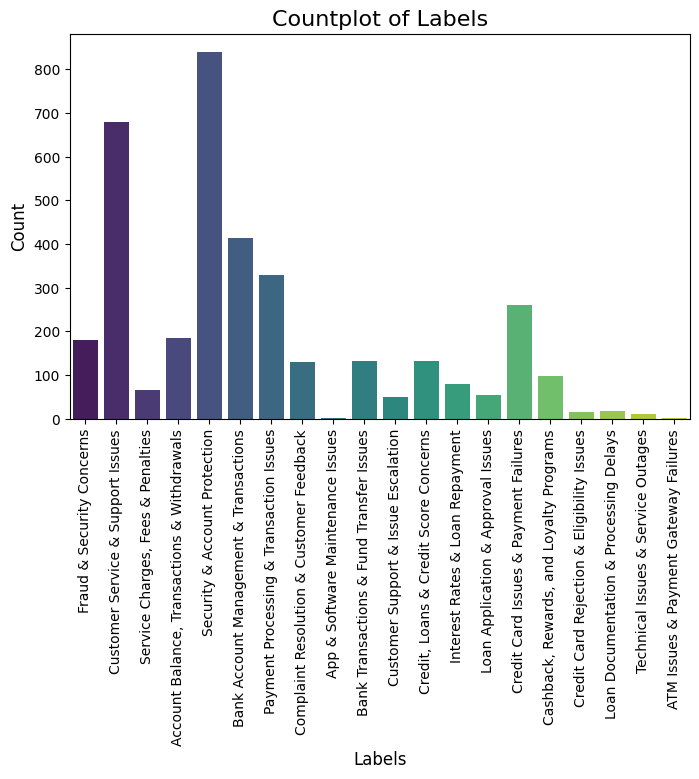

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='labels', palette='viridis')
plt.xticks(rotation=90, fontsize=10)
plt.title('Countplot of Labels', fontsize=16)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
df.shape

(3677, 6)

In [ ]:
df.isnull().sum()

,0
complaint_link,0
description,0
cleaned_description,0
processed_description,0
tokenized_words,0
labels,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['labels'].unique()

array(['Fraud & Security Concerns', 'Customer Service & Support Issues',
       'Service Charges, Fees & Penalties',
       'Account Balance, Transactions & Withdrawals',
       'Security & Account Protection',
       'Bank Account Management & Transactions',
       'Payment Processing & Transaction Issues',
       'Complaint Resolution & Customer Feedback',
       'App & Software Maintenance Issues',
       'Bank Transactions & Fund Transfer Issues',
       'Customer Support & Issue Escalation',
       'Credit, Loans & Credit Score Concerns',
       'Interest Rates & Loan Repayment',
       'Loan Application & Approval Issues',
       'Credit Card Issues & Payment Failures',
       'Cashback, Rewards, and Loyalty Programs',
       'Credit Card Rejection & Eligibility Issues',
       'Loan Documentation & Processing Delays',
       'Technical Issues & Service Outages',
       'ATM Issues & Payment Gateway Failures'], dtype=object)

In [ ]:

label_to_category = {
   "Bank Account Management & Transactions": "Account Management & Transactions",
   "Account Balance, Transactions & Withdrawals": "Account Management & Transactions",
   "Bank Transactions & Fund Transfer Issues": "Account Management & Transactions",
   "Fraud & Security Concerns": "Fraud & Security Concerns",
   "Security & Account Protection": "Fraud & Security Concerns",
   "Customer Service & Support Issues": "Customer Service & Feedback",
   "Customer Support & Issue Escalation": "Customer Service & Feedback",
   "Complaint Resolution & Customer Feedback": "Customer Service & Feedback",
   "Credit Card Issues & Payment Failures": "Credit Card Issues",
   "Credit, Loans & Credit Score Concerns": "Credit & Loan Issues",
   "Cashback, Rewards, and Loyalty Programs": "Rewards & Cashback",
   "Payment Processing & Transaction Issues": "Payment Processing & Transaction Issues",
   "Technical Issues & Service Outages": "Technical & Service Issues",
   "Service Charges, Fees & Penalties":"Fees & Penalties",
  "ATM Issues & Payment Gateway Failures":"ATM Issues & Payment Gateway Failures",
   "App & Software Maintenance Issues":"Technical & Service Issues",
   "Interest Rates & Loan Repayment":"Loan issues",
   "Loan Application & Approval Issues":"Loan issues",
   "Credit Card Rejection & Eligibility Issues":"Credit & Loan Issues",
   "Loan Documentation & Processing Delays":"Loan issues"
}

df["labels"] = df["labels"].map(label_to_category)
df.head()

,complaint_link,description,cleaned_description,processed_description,tokenized_words,labels
0,Bank held amount without notice,Bank has been converted my salaried account in...,bank has been converted my salaried account in...,bank convert salaried account save account wit...,"['bank', 'convert', 'salaried', 'account', 'sa...",Fraud & Security Concerns
1,Remove my pan card for irda,I am Vikas choubey I was agent with Hdfc life ...,i am vikas choubey i was agent with hdfc life ...,I vikas choubey I agent hdfc life insurance ye...,"['I', 'vikas', 'choubey', 'I', 'agent', 'hdfc'...",Customer Service & Feedback
2,Balance deduction,"Address:Kashipur, uttarakhandHdfc bank did thi...",address kashipur uttarakhandhdfc bank did this...,address kashipur uttarakhandhdfc bank without ...,"['address', 'kashipur', 'uttarakhandhdfc', 'ba...",Fees & Penalties
3,Amount deducted from my account without inform...,Yesterday I got a mail that your account has b...,yesterday i got a mail that your account has b...,yesterday I get mail account debit maintain en...,"['yesterday', 'I', 'get', 'mail', 'account', '...",Account Management & Transactions
4,Adhoc stmt chgs incl gst,"HI Team, \n\nThere has been a deduction of 118...",hi team there has been a deduction of rs from ...,hi team deduction rs account state reason kind...,"['hi', 'team', 'deduction', 'rs', 'account', '...",Fraud & Security Concerns


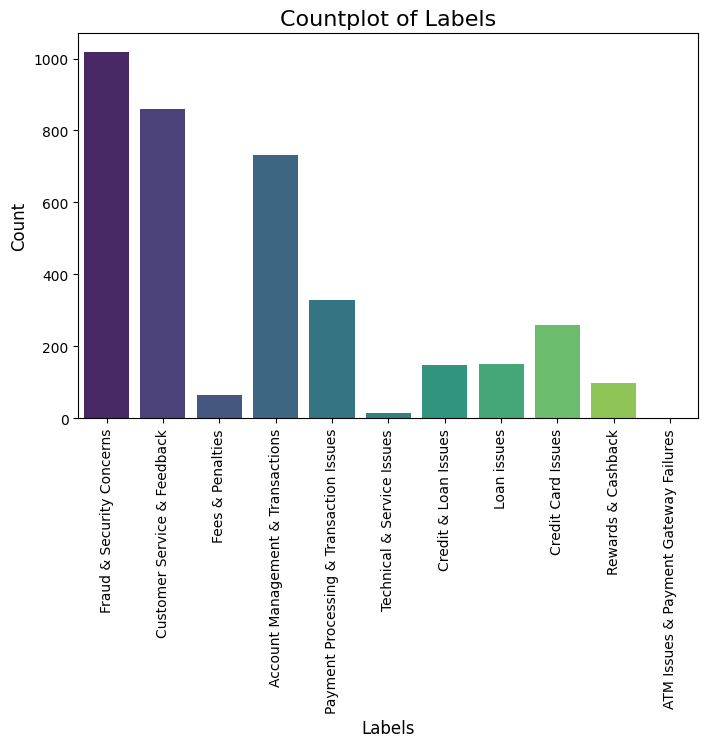

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='labels', palette='viridis')
plt.xticks(rotation=90, fontsize=10)
plt.title('Countplot of Labels', fontsize=16)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
import pandas as pd
from textblob import TextBlob

# Define TextBlob-based functions
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Range: -1 to 1
    return polarity

def classify_severity(polarity):
    if polarity < -0.5:
        return "Critical"
    elif -0.5 <= polarity < 0:
        return "High"
    elif 0 <= polarity < 0.5:
        return "Medium"
    else:
        return "Low"

def classify_urgency(description, severity):
    keywords = ["urgent", "immediately", "important", "critical"]
    if severity in ["Critical", "High"]:
        return "Urgent"
    elif any(keyword in description.lower() for keyword in keywords):
        return "Urgent"
    else:
        return "Non-Urgent"

# Apply TextBlob-based analysis
df['polarity'] = df['cleaned_description'].apply(get_textblob_sentiment)
df['severity'] = df['polarity'].apply(classify_severity)
df['urgency'] = df.apply(lambda row: classify_urgency(row['cleaned_description'], row['severity']), axis=1)

# Save updated dataset to a new CSV file
df.to_csv('Final_dataset.csv', index=False)
df


,complaint_link,description,cleaned_description,processed_description,tokenized_words,labels,polarity,severity,urgency
0,Bank held amount without notice,Bank has been converted my salaried account in...,bank has been converted my salaried account in...,bank convert salaried account save account wit...,"['bank', 'convert', 'salaried', 'account', 'sa...",Fraud & Security Concerns,-0.031250,High,Non-Urgent
1,Remove my pan card for irda,I am Vikas choubey I was agent with Hdfc life ...,i am vikas choubey i was agent with hdfc life ...,I vikas choubey I agent hdfc life insurance ye...,"['I', 'vikas', 'choubey', 'I', 'agent', 'hdfc'...",Customer Service & Feedback,-0.125000,High,Non-Urgent
2,Balance deduction,"Address:Kashipur, uttarakhandHdfc bank did thi...",address kashipur uttarakhandhdfc bank did this...,address kashipur uttarakhandhdfc bank without ...,"['address', 'kashipur', 'uttarakhandhdfc', 'ba...",Fees & Penalties,0.000000,Medium,Non-Urgent
3,Amount deducted from my account without inform...,Yesterday I got a mail that your account has b...,yesterday i got a mail that your account has b...,yesterday I get mail account debit maintain en...,"['yesterday', 'I', 'get', 'mail', 'account', '...",Account Management & Transactions,0.000000,Medium,Non-Urgent
4,Adhoc stmt chgs incl gst,"HI Team, \n\nThere has been a deduction of 118...",hi team there has been a deduction of rs from ...,hi team deduction rs account state reason kind...,"['hi', 'team', 'deduction', 'rs', 'account', '...",Fraud & Security Concerns,0.600000,Low,Non-Urgent
...,...,...,...,...,...,...,...,...,...
3672,Deduction of fees for insufficient balance in ...,"Hello, \n\nThis is totally not acceptable hdfc...",hello this is totally not acceptable hdfc is c...,hello totally acceptable hdfc charge high char...,"['hello', 'totally', 'acceptable', 'hdfc', 'ch...",Credit Card Issues,0.060000,Medium,Non-Urgent
3673,My void refund has not been credited,I did a transaction of 7375 but merchant mista...,i did a transaction of but merchant mistakenl...,I transaction merchant mistakenly void transac...,"['I', 'transaction', 'merchant', 'mistakenly',...",Payment Processing & Transaction Issues,0.000000,Medium,Non-Urgent
3674,Although I have not received the passbook and ...,Address:Ghogargan tahsil Shrigonda District Ah...,shrigonda district ahmednagarmy bank account n...,shrigonda district ahmednagarmy bank account n...,"['shrigonda', 'district', 'ahmednagarmy', 'ban...",Fraud & Security Concerns,0.000000,Medium,Non-Urgent
3675,Charges,Address:ChomuHlo mu self Narayan lal yadav .\n...,narayan lal yadav i also have a same problem t...,narayan lal yadav I also problem account deduc...,"['narayan', 'lal', 'yadav', 'I', 'also', 'prob...",Payment Processing & Transaction Issues,0.000000,Medium,Non-Urgent


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("Final_dataset.csv")

In [ ]:
df

,complaint_link,description,cleaned_description,processed_description,tokenized_words,labels,polarity,severity,urgency
0,Bank held amount without notice,Bank has been converted my salaried account in...,bank has been converted my salaried account in...,bank convert salaried account save account wit...,"['bank', 'convert', 'salaried', 'account', 'sa...",Fraud & Security Concerns,-0.031250,High,Non-Urgent
1,Remove my pan card for irda,I am Vikas choubey I was agent with Hdfc life ...,i am vikas choubey i was agent with hdfc life ...,I vikas choubey I agent hdfc life insurance ye...,"['I', 'vikas', 'choubey', 'I', 'agent', 'hdfc'...",Customer Service & Feedback,-0.125000,High,Non-Urgent
2,Balance deduction,"Address:Kashipur, uttarakhandHdfc bank did thi...",address kashipur uttarakhandhdfc bank did this...,address kashipur uttarakhandhdfc bank without ...,"['address', 'kashipur', 'uttarakhandhdfc', 'ba...",Fees & Penalties,0.000000,Medium,Non-Urgent
3,Amount deducted from my account without inform...,Yesterday I got a mail that your account has b...,yesterday i got a mail that your account has b...,yesterday I get mail account debit maintain en...,"['yesterday', 'I', 'get', 'mail', 'account', '...",Account Management & Transactions,0.000000,Medium,Non-Urgent
4,Adhoc stmt chgs incl gst,"HI Team, \n\nThere has been a deduction of 118...",hi team there has been a deduction of rs from ...,hi team deduction rs account state reason kind...,"['hi', 'team', 'deduction', 'rs', 'account', '...",Fraud & Security Concerns,0.600000,Low,Non-Urgent
...,...,...,...,...,...,...,...,...,...
3672,Deduction of fees for insufficient balance in ...,"Hello, \n\nThis is totally not acceptable hdfc...",hello this is totally not acceptable hdfc is c...,hello totally acceptable hdfc charge high char...,"['hello', 'totally', 'acceptable', 'hdfc', 'ch...",Credit Card Issues,0.060000,Medium,Non-Urgent
3673,My void refund has not been credited,I did a transaction of 7375 but merchant mista...,i did a transaction of but merchant mistakenl...,I transaction merchant mistakenly void transac...,"['I', 'transaction', 'merchant', 'mistakenly',...",Payment Processing & Transaction Issues,0.000000,Medium,Non-Urgent
3674,Although I have not received the passbook and ...,Address:Ghogargan tahsil Shrigonda District Ah...,shrigonda district ahmednagarmy bank account n...,shrigonda district ahmednagarmy bank account n...,"['shrigonda', 'district', 'ahmednagarmy', 'ban...",Fraud & Security Concerns,0.000000,Medium,Non-Urgent
3675,Charges,Address:ChomuHlo mu self Narayan lal yadav .\n...,narayan lal yadav i also have a same problem t...,narayan lal yadav I also problem account deduc...,"['narayan', 'lal', 'yadav', 'I', 'also', 'prob...",Payment Processing & Transaction Issues,0.000000,Medium,Non-Urgent


In [ ]:
print(df['labels'].value_counts())

labels
Fraud & Security Concerns                  1019
Customer Service & Feedback                 861
Account Management & Transactions           731
Payment Processing & Transaction Issues     330
Credit Card Issues                          260
Loan issues                                 151
Credit & Loan Issues                        147
Rewards & Cashback                           97
Fees & Penalties                             66
Technical & Service Issues                   14
ATM Issues & Payment Gateway Failures         1
Name: count, dtype: int64


In [ ]:
# Merging rare classes
df['labels'] = df['labels'].replace({
    'ATM Issues & Payment Gateway Failures': 'Payment Processing & Transaction Issues',
    'Technical & Service Issues': 'Customer Service & Feedback'
})

# Re-check class distribution
print(df['labels'].value_counts())


labels
Fraud & Security Concerns                  1019
Customer Service & Feedback                 875
Account Management & Transactions           731
Payment Processing & Transaction Issues     331
Credit Card Issues                          260
Loan issues                                 151
Credit & Loan Issues                        147
Rewards & Cashback                           97
Fees & Penalties                             66
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

X = df['description']
y = df['labels']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_tfidf, y)

from collections import Counter
print("Class distribution after SMOTE:", Counter(y_balanced))


Class distribution after SMOTE: Counter({'Fraud & Security Concerns': 1019, 'Customer Service & Feedback': 1019, 'Fees & Penalties': 1019, 'Account Management & Transactions': 1019, 'Payment Processing & Transaction Issues': 1019, 'Credit & Loan Issues': 1019, 'Loan issues': 1019, 'Credit Card Issues': 1019, 'Rewards & Cashback': 1019})


In [ ]:
# Remove classes with very few samples
min_samples = 5
class_counts = y.value_counts()

valid_classes = class_counts[class_counts >= min_samples].index
X_filtered = X[y.isin(valid_classes)]
y_filtered = y[y.isin(valid_classes)]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42  # Adjust test_size and random_state as needed
)


In [ ]:
X_balanced

<9171x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 535273 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize one-hot encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the labels into one-hot format
y_train_onehot = onehot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test.values.reshape(-1, 1))

# Display the one-hot encoding
print("One-Hot Encoded Labels (Example):")
print(y_train_onehot[:5])


One-Hot Encoded Labels (Example):
[[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
import numpy as np

# Create numeric labels for model compatibility
y_train_numeric = np.argmax(y_train_onehot, axis=1)
y_test_numeric = np.argmax(y_test_onehot, axis=1)

# Check mapping (numeric to original labels)
print("Numeric to Original Mapping:")
for i, category in enumerate(onehot_encoder.categories_[0]):
    print(f"{i} -> {category}")


Numeric to Original Mapping:
0 -> Account Management & Transactions
1 -> Credit & Loan Issues
2 -> Credit Card Issues
3 -> Customer Service & Feedback
4 -> Fees & Penalties
5 -> Fraud & Security Concerns
6 -> Loan issues
7 -> Payment Processing & Transaction Issues
8 -> Rewards & Cashback


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train the XGBoost model
xgb_model = XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train_numeric)

# Make predictions
y_pred_numeric = xgb_model.predict(X_test)

# Convert numeric predictions back to one-hot encoding and then to original labels
y_pred_onehot = np.zeros_like(y_test_onehot)
y_pred_onehot[np.arange(len(y_pred_numeric)), y_pred_numeric] = 1
y_pred_labels = onehot_encoder.inverse_transform(y_pred_onehot)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_labels))

Classification Report:
                                         precision    recall  f1-score   support

      Account Management & Transactions       0.77      0.75      0.76       202
                   Credit & Loan Issues       0.96      1.00      0.98       206
                     Credit Card Issues       0.93      0.97      0.95       204
            Customer Service & Feedback       0.82      0.74      0.78       218
                       Fees & Penalties       1.00      1.00      1.00       204
              Fraud & Security Concerns       0.65      0.57      0.61       195
                            Loan issues       0.96      1.00      0.98       200
Payment Processing & Transaction Issues       0.87      0.97      0.92       191
                     Rewards & Cashback       0.98      1.00      0.99       209

                               accuracy                           0.89      1829
                              macro avg       0.88      0.89      0.88      1829
   

In [ ]:
import joblib

# Save the XGBoost model
joblib.dump(xgb_model, 'xgb_complaint_classifier.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save the OneHotEncoder
joblib.dump(onehot_encoder, 'onehot_encoder.pkl')


['onehot_encoder.pkl']

In [ ]:
# Load the saved model and preprocessing objects
xgb_model = joblib.load('xgb_complaint_classifier.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')
onehot_encoder = joblib.load('onehot_encoder.pkl')


In [ ]:
# Example new complaint
new_complaint = ["My bank statement has not been up to date these days , it is not showing the transactions being done."]

# Step 1: Preprocess the complaint (TF-IDF transformation)
new_complaint_tfidf = vectorizer.transform(new_complaint)

# Step 2: Predict the numeric label
predicted_numeric = xgb_model.predict(new_complaint_tfidf)

# Step 3: Map numeric prediction back to original class label
predicted_onehot = np.zeros((1, len(onehot_encoder.categories_[0])))
predicted_onehot[0, predicted_numeric] = 1
predicted_label = onehot_encoder.inverse_transform(predicted_onehot)

print("Predicted Complaint Category:", predicted_label[0])


Predicted Complaint Category: ['Account Management & Transactions']


In [ ]:
def predict_complaint_category(complaint_text):
    # Preprocess the text
    complaint_tfidf = vectorizer.transform([complaint_text])

    # Predict the numeric class
    predicted_numeric = xgb_model.predict(complaint_tfidf)

    # Map back to the original class label
    predicted_onehot = np.zeros((1, len(onehot_encoder.categories_[0])))
    predicted_onehot[0, predicted_numeric] = 1
    predicted_label = onehot_encoder.inverse_transform(predicted_onehot)

    return predicted_label[0]

# Example usage
new_complaint = "My credit card has been blocked by someone other than me , i want to get this fixed."
predicted_category = predict_complaint_category(new_complaint)
print("Predicted Complaint Category:", predicted_category)


Predicted Complaint Category: ['Fraud & Security Concerns']


In [ ]:
predict_complaint_category("I am Vikas choubey I was agent with Hdfc life insurance in the year 27/05/2024. But due to some problem. Now my pan card is not remove from IRDA portal.please remove my pan card IRDA portal. My consultant code is[protected] My pan no.BFZPC0207G Regards Vikas choubey...")

array(['Customer Service & Feedback'], dtype=object)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Apply Random Oversampling
random_oversampler = RandomOverSampler(random_state=42)
X_balanced, y_balanced = random_oversampler.fit_resample(X_tfidf, y)

# Check class distribution after oversampling
from collections import Counter
print("Class distribution after oversampling:", Counter(y_balanced))


Class distribution after oversampling: Counter({'Fraud & Security Concerns': 1019, 'Customer Service & Feedback': 1019, 'Fees & Penalties': 1019, 'Account Management & Transactions': 1019, 'Payment Processing & Transaction Issues': 1019, 'Credit & Loan Issues': 1019, 'Loan issues': 1019, 'Credit Card Issues': 1019, 'Rewards & Cashback': 1019})


In [ ]:
# Split the balanced dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    random_state=42,
    class_weight='balanced'  # Handles imbalance internally as well
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.867574931880109
Classification Report:
                                          precision    recall  f1-score   support

      Account Management & Transactions       0.74      0.68      0.71       204
                   Credit & Loan Issues       0.94      1.00      0.97       211
                     Credit Card Issues       0.87      0.97      0.91       205
            Customer Service & Feedback       0.72      0.71      0.72       205
                       Fees & Penalties       1.00      1.00      1.00       201
              Fraud & Security Concerns       0.61      0.50      0.55       206
                            Loan issues       0.96      1.00      0.98       207
Payment Processing & Transaction Issues       0.92      0.95      0.94       195
                     Rewards & Cashback       0.98      1.00      0.99       201

                               accuracy                           0.87      1835
                              macro avg       0.86     

In [ ]:
# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_complaint_classifier.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
# Load the saved model and vectorizer
rf_model = joblib.load('random_forest_complaint_classifier.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Function to predict complaint category
def predict_complaint_category_rf(complaint_text):
    # Step 1: Preprocess the complaint (TF-IDF transformation)
    complaint_tfidf = vectorizer.transform([complaint_text])

    # Step 2: Predict the category
    predicted_category = rf_model.predict(complaint_tfidf)

    return predicted_category[0]

# Example usage
new_complaint = "I was charged extra fees on my credit card statement."
predicted_category = predict_complaint_category_rf(new_complaint)
print("Predicted Complaint Category:", predicted_category)


Predicted Complaint Category: Credit Card Issues


In [ ]:

# Example usage
new_complaint = "My credit card has been blocked by someone other than me , i want to get this fixed."
predicted_category = predict_complaint_category_rf(new_complaint)
print("Predicted Complaint Category:", predicted_category)


Predicted Complaint Category: Fraud & Security Concerns


In [ ]:

# Example usage
new_complaint = "My bank statement has not been up to date these days , it is not showing the transactions being done."
predicted_category = predict_complaint_category_rf(new_complaint)
print("Predicted Complaint Category:", predicted_category)


Predicted Complaint Category: Payment Processing & Transaction Issues
